In [11]:
!pip install FinMind #1.7.8
!pip install Backtesting Bokeh
!pip install bs4

In [12]:
import numpy as np
import pandas as pd
from ta.momentum import StochasticOscillator
from FinMind import strategies
from FinMind.data import DataLoader
from FinMind.strategies.base import Strategy

class Kd2(Strategy):
    """
    url: "https://www.mirrormedia.mg/story/20180719fin012/"
    summary:
        網路上常見的 kd 交易策略
        日KD 80 20
        日K線 <= 20 進場
        日K線 >= 80 出場
    """

    k_days = 9
    kd_upper = 80
    kd_lower = 30

    def create_trade_sign(self, stock_price: pd.DataFrame, additional_dataset_obj) -> pd.DataFrame:
        stock_price = stock_price.sort_values("date")
        kd = StochasticOscillator(
            high=stock_price["max"],
            low=stock_price["min"],
            close=stock_price["close"],
            n=self.k_days,
        )
        rsv_ = kd.stoch().fillna(50)
        _k = np.zeros(stock_price.shape[0])
        _d = np.zeros(stock_price.shape[0])
        for i, r in enumerate(rsv_):
            if i == 0:
                _k[i] = 50
                _d[i] = 50
            else:
                _k[i] = _k[i - 1] * 2 / 3 + r / 3
                _d[i] = _d[i - 1] * 2 / 3 + _k[i] / 3

        stock_price["K"] = _k
        stock_price["D"] = _d
        stock_price.index = range(len(stock_price))
        stock_price["signal"] = 0
        stock_price.loc[stock_price["K"] <= self.kd_lower, "signal"] = 1
        stock_price.loc[stock_price["K"] >= self.kd_upper, "signal"] = -1
        return stock_price
        
data_loader = DataLoader()
# data_loader.login(user_id, password) # 可選
obj = strategies.BackTest(
     stock_id="0056",
     start_date="2024-01-01",
     end_date="2025-01-01",
     trader_fund=500000.0,
     fee=0.001425,
     data_loader=data_loader,
)

obj.add_strategy(Kd2)
obj.simulate()

# 回測詳細資料
trade_detail = obj.trade_detail

# 大盤累積報酬和回測累積報酬走勢
compare_market_detail = obj.compare_market_detail

# 回測結果，包含總報酬(FinalProfitPer)、年化報酬(AnnualReturnPer)、最大損失(MaxLoss)、最大損失比例(MaxLossPer)...等
final_stats = obj.final_stats

# 大盤年化報酬率和策略年化報酬率
compare_market_stats = obj.compare_market_stats

print(final_stats)

obj.plot()

2025-01-13 13:02:36.847 | INFO     | FinMind.data.finmind_api:get_data:148 - download Dataset.TaiwanStockInfo, data_id: 


Exception: ('Connection broken: IncompleteRead(76890 bytes read, 368855 more expected)', IncompleteRead(76890 bytes read, 368855 more expected))

In [ ]:
from FinMind import strategies
from FinMind.data import DataLoader

data_loader = DataLoader()
bt = strategies.BackTest(
    stock_id="0056",
    start_date="2024-01-01",
    end_date="2025-01-01",
    trader_fund=500000.0,
    fee=0.001425,
    data_loader=data_loader,
)

# 設定策略
bt.add_strategy(strategies.Kd)

# 回測
bt.simulate()

# 回測詳細資料
trade_detail = bt.trade_detail

# 大盤累積報酬和回測累積報酬走勢
compare_market_detail = bt.compare_market_detail

# 回測結果，包含總報酬(FinalProfitPer)、年化報酬(AnnualReturnPer)、最大損失(MaxLoss)、最大損失比例(MaxLossPer)...等
final_stats = bt.final_stats

# 大盤年化報酬率和策略年化報酬率
compare_market_stats = bt.compare_market_stats

#print(trade_detail)
#print(compare_market_detail)
print(final_stats)
#print(compare_market_stats)

bt.plot()

In [1]:
from FinMind.data import DataLoader

start_date='2024-01-01'
end_date='2024-12-27'

stock_no = '0050'

api = DataLoader()
# api.login_by_token(api_token='token')
# api.login(user_id='user_id',password='password')

taiwan_stock_daily_df = api.taiwan_stock_daily(stock_id=stock_no, start_date=start_date)

taiwan_stock_institutional_investors_df = api.taiwan_stock_institutional_investors(
    stock_id=stock_no,
    start_date=start_date,
    end_date=end_date,
)



2025-01-09 08:51:14.677 | INFO     | FinMind.data.finmind_api:get_data:148 - download Dataset.TaiwanStockPrice, data_id: 0050
2025-01-09 08:51:28.782 | INFO     | FinMind.data.finmind_api:get_data:148 - download Dataset.TaiwanStockInstitutionalInvestorsBuySell, data_id: 0050


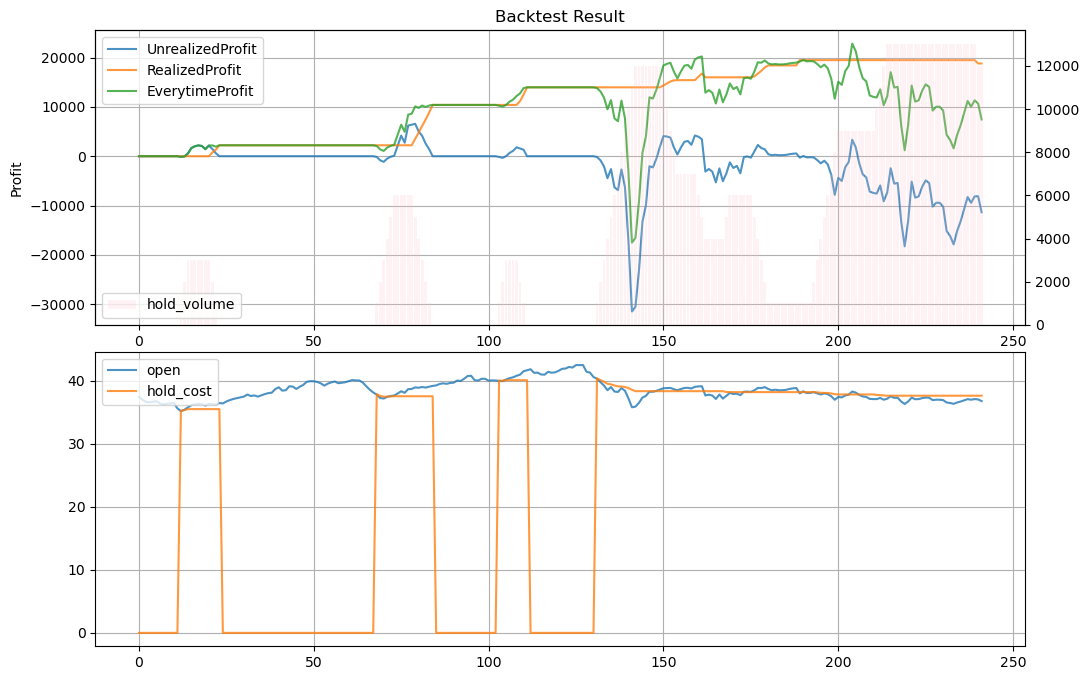

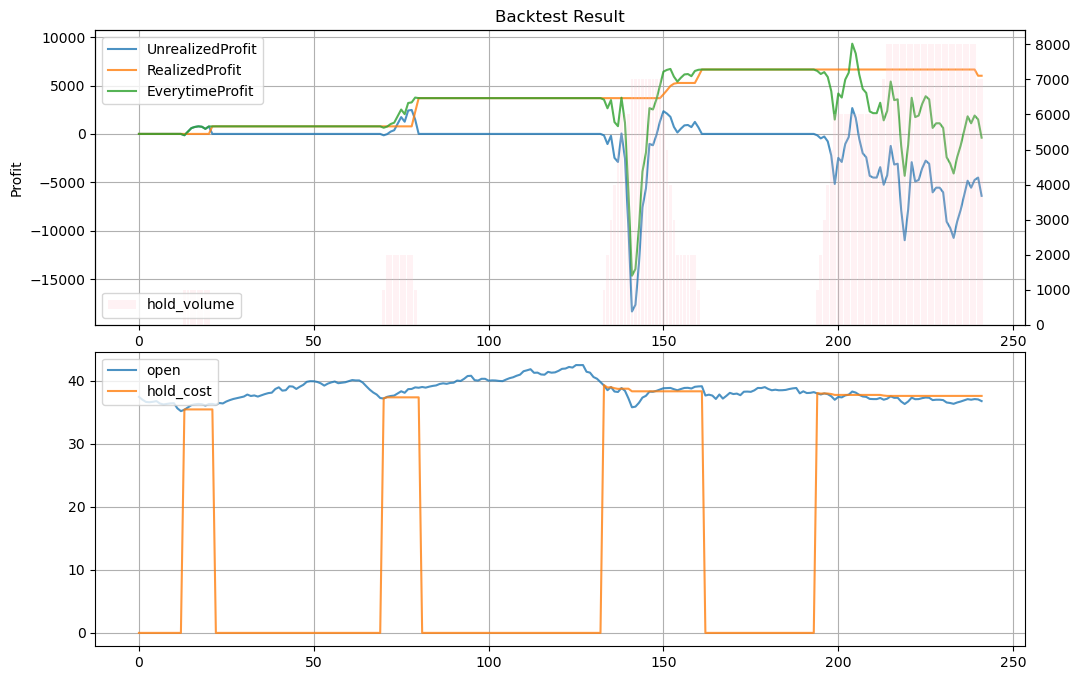

In [26]:
obj.plot()
bt.plot()